In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras import Sequential

## Sequential Model

In [ ]:
input_shape = (28, 28, 3)

model = Sequential([
    Conv2D(32, 2, activation = 'relu', padding = 'same', input_shape = input_shape),
    Conv2D(64, 3, activation = 'relu'),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        416       
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 flatten_6 (Flatten)         (None, 43264)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               5537920   
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 5,558,122
Trainable params: 5,558,122
Non-trainable params: 0
_________________________________________________________________


## Functional Api Model

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, MaxPooling2D

In [ ]:
input_shape = (28, 28, 3)

inputs = Input(shape = input_shape)
conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape = input_shape)(inputs)
conv2 = Conv2D(64, 3, activation = 'relu')(conv1)

flatten = Flatten()(conv2)

dense1 = Dense(128, activation = 'relu')(flatten)
dense2 = Dense(10, activation = 'relu')(dense1)

model2 = Model(inputs = inputs, outputs = dense2)

In [ ]:
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 flatten_5 (Flatten)         (None, 43264)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               5537920   
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 5,558,602
Trainable params: 5,558,602
Non-tra

In [ ]:
from tensorflow.keras.layers import Concatenate

In [ ]:
input_shape2 = (256, 256, 3)

inputs = Input(shape = input_shape2)

conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same')(inputs)
conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same')(conv1)

skip1 = Concatenate(axis = -1)([inputs, conv2])

pool1 = MaxPooling2D()(skip1)
conv3 = Conv2D(64, 3, activation = 'relu', padding = 'same')(pool1)
conv4 = Conv2D(32, 3, activation = 'relu', padding = 'same')(conv3)

#skip2 = Concatenate(axis = -1)([conv2, conv4])

outputs = Conv2D(1, (1, 1), activation = 'sigmoid')(conv4)

model3 = Model(inputs = inputs, outputs = outputs)

In [ ]:
from keras.utils.vis_utils import plot_model

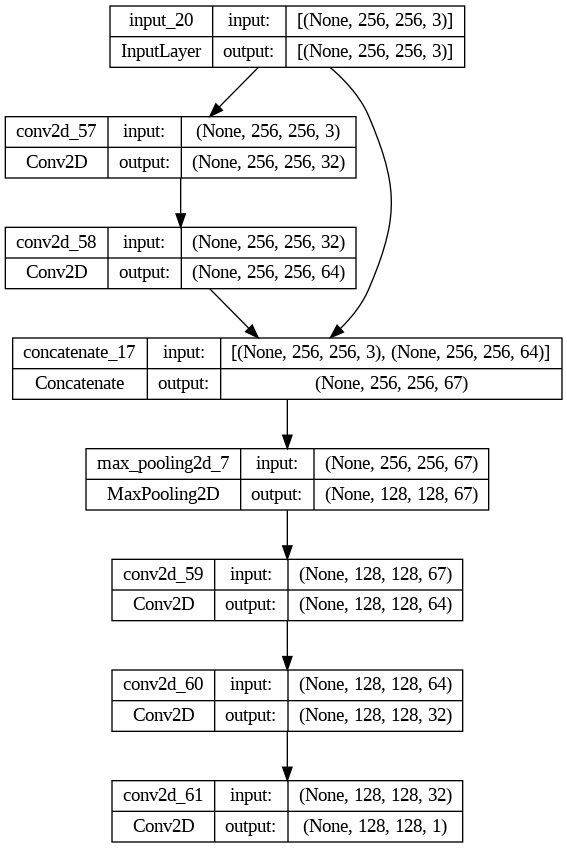

In [ ]:
plot_model(model3, show_shapes=True, show_layer_names=True)

In [ ]:
! gdown --id 1u8qjbyemjCHzLoBCTAnjTxqMVUs8neip

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1u8qjbyemjCHzLoBCTAnjTxqMVUs8neip
To: /content/train_11_12.zip
100% 840M/840M [00:15<00:00, 55.6MB/s]


In [ ]:
! gdown --id 1XDOTF_TuW0K4vMwdB_-8Q5XbATlOZAKR

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XDOTF_TuW0K4vMwdB_-8Q5XbATlOZAKR
To: /content/Base13.zip
100% 386M/386M [00:05<00:00, 72.6MB/s]


In [ ]:
import tensorflow as tf
from glob import glob
import pandas as pd

In [ ]:
from zipfile import ZipFile
file_name = "/content/train_11_12.zip"

with ZipFile(file_name,'r') as openZip:
  openZip.extractall()
  print('Done')

KeyboardInterrupt: ignored

In [ ]:
from zipfile import ZipFile
file_name = "/content/Base13.zip"

with ZipFile(file_name,'r') as openZip:
  openZip.extractall()
  print('Done')

Done


In [ ]:
train_path = '/content/train_11_12'
test_path = '/content/Base13'


train_Impath = glob(train_path+'/*.tif')
test_Impath = glob(test_path+'/*.tif')
df = pd.DataFrame(train_Impath, columns = ['filepath'])
df3 = pd.DataFrame(test_Impath, columns = ['filepath'])

In [ ]:
df2 = pd.read_excel(r"/content/train_11_12.xlsx")
df4 = pd.read_excel(r"/content/Annotation_Base13.xls")

In [ ]:
def fun(a):
    return str(a)

In [ ]:
df['Retinopathy_grade'] = df2['Retinopathy grade'].apply(fun)
df3['Retinopathy_grade'] = df4['Retinopathy grade'].apply(fun)

In [ ]:
df_train = df.copy()
df_test = df3.copy()
df_train.head()

,filepath,Retinopathy_grade
0,/content/train_11_12/20051214_56944_0100_PP.tif,3
1,/content/train_11_12/20051020_55701_0100_PP.tif,0
2,/content/train_11_12/20051020_53997_0100_PP.tif,1
3,/content/train_11_12/20051021_39552_0100_PP.tif,2
4,/content/train_11_12/20051213_61892_0100_PP.tif,3


In [ ]:
tf.random.set_seed(42)

In [ ]:
Epochs = 5
Img_size = 512
Batch_size = 32

classes = {0 : "No DR",
           1 : "Mild DR",
           2 : "Severe DR",
           3 : "Proliferate DR"}

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1./255,
                                                         validation_split = 0.1)
# datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1./255,
#                                                           rotation_range = 0.2,
#                                                           shear_range = 0.2,
#                                                           zoom_range = 0.2,
#                                                           width_shift_range = 0.2,
#                                                           height_shift_range = 0.3,
#                                                          horizontal_flip = True,
#                                                          validation_split = 0.1)

In [ ]:
train_gen = datagen.flow_from_dataframe(dataframe = df_train,
                                   x_col = 'filepath',
                                   y_col = 'Retinopathy_grade',
                                   subset = 'training',
                                   seed = 1,
                                   batch_size = Batch_size,
                                   color_mode = 'rgb',
                                   shuffle = True,
                                   class_mode = 'categorical',
                                   target_size = (Img_size, Img_size))

valid_gen = datagen.flow_from_dataframe(dataframe = df_train,
                                   x_col = 'filepath',
                                   y_col = 'Retinopathy_grade',
                                   subset = 'validation',
                                   seed = 1,
                                   batch_size = Batch_size,
                                   color_mode = 'rgb',
                                   shuffle = False,
                                   class_mode = 'categorical',
                                   target_size = (Img_size, Img_size))

test_gen = datagen.flow_from_dataframe(dataframe = df_test,
                                      x_col = 'filepath',
                                      y_col = 'Retinopathy_grade',
                                      batch_size = Batch_size,
                                      seed = 1,
                                      color_mode = 'rgb',
                                      shuffle = False,
                                      class_mode = None,
                                      target_size = (Img_size, Img_size))

Found 180 validated image filenames belonging to 4 classes.
Found 20 validated image filenames belonging to 4 classes.
Found 100 validated image filenames.


In [ ]:
step_size_train = train_gen.n//train_gen.batch_size
step_size_valid = valid_gen.n//valid_gen.batch_size

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  #plot accuracy
  plt.plot(epochs, accuracy, label = "training accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
import tensorflow as tf
import pandas as pd
from glob import glob

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

In [ ]:
model4 = Sequential([
    Conv2D(10, 3, input_shape = (512, 512, 3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dropout(.2),
    Dense(100, activation = 'relu'),
    Dropout(.2),
    Dense(4, activation = 'softmax')
])

In [ ]:
model4.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history4 = model4.fit(x = train_gen,
            steps_per_epoch = step_size_train,
            validation_data = valid_gen,
            validation_steps = step_size_valid,
            epochs = 40)

In [ ]:
plot_loss_curves(history4)

In [ ]:
tf.keras.model.load("/content/model4_d2.h5")

AttributeError: ignored

In [ ]:
loaded_1 = tf.keras.models.load_model(
    "/content/model4_d2.h5")

In [ ]:
predicted = loaded_1.predict(test_gen)

4/4 [==============================] - 12s 3s/step


In [ ]:
type(predicted)

numpy.ndarray

In [ ]:
predicted = list(predicted)

In [ ]:
predicted

array([73, 76,  5, 97])

In [ ]:
output_class = tf.argmax(predicted)

In [ ]:
output_class = []
for i in predicted:
  output_class.append(tf.argmax(i))

In [ ]:
output_class = np.array(output_class)
output_class

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 2, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 1, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0])

In [ ]:
output_class = np.array(tf.argmax([i for i in predicted]))
print(output_class)

3


In [ ]:
predicted = np.array(tf.argmax(predicted))
dict2 = {}
for i in predicted:
  if(i in dict2.keys()):
    dict2[i] = dict2[i]+1
  else:
    dict2[i] = 1

In [ ]:
predicted

array([73, 76,  5, 97])

In [ ]:
import numpy as np

In [ ]:
output_class = np.array(output_class)
len(output_class)

100

In [ ]:
df3['Retinopathy_grade']

0     3
1     3
2     2
3     0
4     0
     ..
95    3
96    3
97    3
98    3
99    3
Name: Retinopathy_grade, Length: 100, dtype: object

In [ ]:
dict1 = {}
for i in df3['Retinopathy_grade']:
  if(i in dict1.keys()):
    dict1[i] = dict1[i]+1
  else:
    dict1[i] = 1

dict2 = {}
for i in output_class:
  if(i in dict2.keys()):
    dict2[i] = dict2[i]+1
  else:
    dict2[i] = 1


In [ ]:
dict1, dict2

({'3': 18, '2': 24, '0': 52, '1': 6}, {0: 83, 2: 6, 1: 5, 3: 6})

In [ ]:
Dict_ks = list(Dict1.keys())
myKeys.sort()
sorted_dict = {i: myDict[i] for i in myKeys}

NameError: ignored

In [ ]:
def sort_dictionary(dictionary):
  dict_keys = list(dictionary.keys())
  dict_keys.sort()
  return {i: dictionary[i] for i in dict_keys}

In [ ]:
dict1, sort_dictionary(dict1)

({'3': 18, '2': 24, '0': 52, '1': 6}, {'0': 52, '1': 6, '2': 24, '3': 18})

In [ ]:
values1 = list(sort_dictionary(dict1).values())
values2 = list(sort_dictionary(dict2).values())

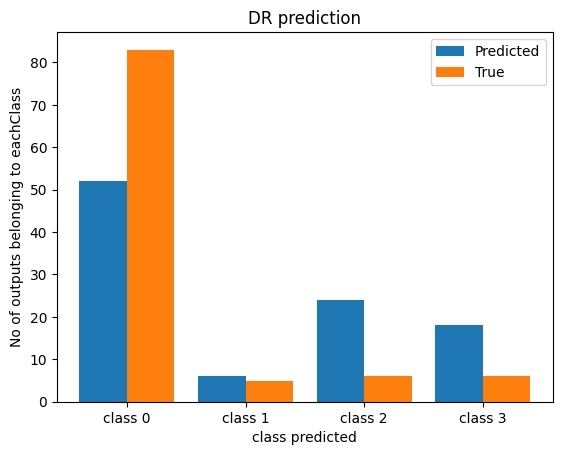

In [ ]:
import matplotlib.pyplot as plt

X = ['class 0','class 1','class 2','class 3']
Ygirls = values1
Zboys = values2

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Predicted')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'True')

plt.xticks(X_axis, X)
plt.xlabel("class predicted")
plt.ylabel("No of outputs belonging to eachClass")
plt.title("DR prediction")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
def sort_dictionary(dictionary):
  dict_keys = list(dictionary.keys())
  dict_keys.sort()
  return {i: dictionary[i] for i in dict_keys}

def plot_class_output(actual, predicted):
  dict1 = {}
  dict2 = {}
  output_class = []
  for i in predicted:
    output_class.append(tf.argmax(i))
  output_class = np.array(output_class)

  for i in actual:
    if(i in dict1.keys()):
      dict1[i] = dict1[i]+1
    else:
      dict1[i] = 1

  for i in output_class:
    if(i in dict2.keys()):
      dict2[i] = dict2[i]+1
    else:
      dict2[i] = 1

  values1 = list(sort_dictionary(dict1).values())
  values2 = list(sort_dictionary(dict2).values())

  X = ['class 0','class 1','class 2','class 3']
  Ygirls = values1
  Zboys = values2

  X_axis = np.arange(len(X))

  plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Predicted')
  plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'True')

  plt.xticks(X_axis, X)
  plt.xlabel("class predicted")
  plt.ylabel("No of outputs belonging to eachClass")
  plt.title("DR prediction")
  plt.legend()
  plt.show()

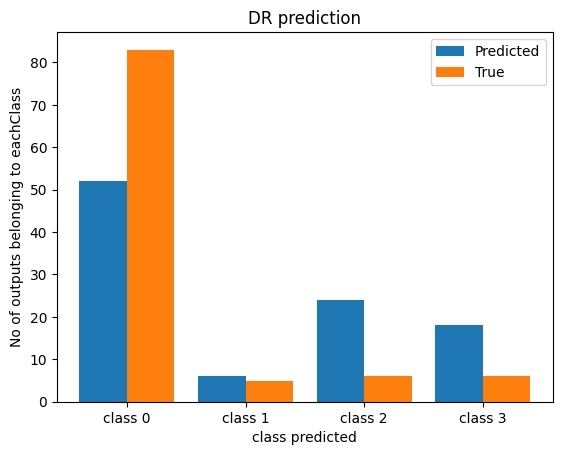

In [ ]:
plot_class_output(df3['Retinopathy_grade'], predicted)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [ ]:
model.fit(X_smote, y_smote)

In [ ]:
df.head()

,filepath,Retinopathy_grade
0,/content/train_11_12/20051214_56944_0100_PP.tif,3
1,/content/train_11_12/20051020_55701_0100_PP.tif,0
2,/content/train_11_12/20051020_53997_0100_PP.tif,1
3,/content/train_11_12/20051021_39552_0100_PP.tif,2
4,/content/train_11_12/20051213_61892_0100_PP.tif,3


In [ ]:
df3['Retinopathy_grade'].value_counts()

0    52
2    24
3    18
1     6
Name: Retinopathy_grade, dtype: int64

In [ ]:
df5 = df3.copy()
df5.head()

,filepath,Retinopathy_grade
0,/content/Base13/20060522_45541_0100_PP.tif,3
1,/content/Base13/20060522_43758_0100_PP.tif,3
2,/content/Base13/20060523_49176_0100_PP.tif,2
3,/content/Base13/20051214_57404_0100_PP.tif,0
4,/content/Base13/20060523_48425_0100_PP.tif,0


In [ ]:
def read_image(path):
  img = cv2.imread(path)
  return img

In [ ]:
df5['Image'] = df5['filepath'].apply(read_image)

In [ ]:
import cv2 as cv2

In [ ]:
df5.head()

,filepath,Retinopathy_grade,Image
0,/content/Base13/20060522_45541_0100_PP.tif,3,"[[[2, 0, 2], [2, 0, 2], [2, 0, 2], [2, 0, 2], ..."
1,/content/Base13/20060522_43758_0100_PP.tif,3,"[[[1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], ..."
2,/content/Base13/20060523_49176_0100_PP.tif,2,"[[[1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], ..."
3,/content/Base13/20051214_57404_0100_PP.tif,0,"[[[1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], ..."
4,/content/Base13/20060523_48425_0100_PP.tif,0,"[[[1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], ..."


In [ ]:
j = 0
for i in df5['Image']:
  j = j + 1
  cv2.imwrite(f'/content/Base13/smote_images2/smote_image{j}.jpg', i)

In [ ]:
X_train = np.array(df5["Image"])
y_train = np.array(df5["Retinopathy_grade"])

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

train_rows=len(X_train)
X_train = X_train.reshape(train_rows,-1)
#(80,30000)

X_train, y_train = sm.fit_resample(X_train, y_train)
X_train = X_train.reshape(-1,2240,1488,3)


ValueError: ignored

In [ ]:
model.fit(X_smote, y_smote)

In [ ]:
df6 = pd.read_excel(r"/content/train.xls")

In [ ]:
df6['Retinopathy grade'].value_counts()

0    452
3    211
2    179
1    118
Name: Retinopathy grade, dtype: int64